In [1]:

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\achoudhary\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py)

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

Import the csv file using pandas dataframe

In [4]:
df = pd.read_csv('Data(EDA_done).csv')

In [5]:
df.head()

,Review_Title,Review_Text,Review_Location,Product,Length,Word_count,mean_word_length,score,sentiment
0,Perfect,"['love', 'use', 'face', 'shower', 'heat', 'giv...",Undisclosed,Multi-Vitamin Thermafoliant,87,18,3.888889,0.7906,1
1,You need this,"['even', 'better', 'daili', 'microfoli', 'obse...",Undisclosed,Multi-Vitamin Thermafoliant,82,14,4.928571,0.2263,1
2,Clean skin,"['enjoy', 'product', 'much', 'look', 'forward'...",Undisclosed,Multi-Vitamin Thermafoliant,77,16,3.875000,0.8074,1
3,Love This Stuff!,"['never', 'tri', 'anyth', 'like', 'love', 'app...",Undisclosed,Multi-Vitamin Thermafoliant,234,45,4.222222,0.7839,1
4,This exfoliates very nicely and,"['exfoli', 'nice', 'give', 'smooth', 'skin', '...",Undisclosed,Multi-Vitamin Thermafoliant,157,30,4.266667,0.6486,1


In [6]:
df.drop(['Review_Location','Product'], axis=1)

,Review_Title,Review_Text,Length,Word_count,mean_word_length,score,sentiment
0,Perfect,"['love', 'use', 'face', 'shower', 'heat', 'giv...",87,18,3.888889,0.7906,1
1,You need this,"['even', 'better', 'daili', 'microfoli', 'obse...",82,14,4.928571,0.2263,1
2,Clean skin,"['enjoy', 'product', 'much', 'look', 'forward'...",77,16,3.875000,0.8074,1
3,Love This Stuff!,"['never', 'tri', 'anyth', 'like', 'love', 'app...",234,45,4.222222,0.7839,1
4,This exfoliates very nicely and,"['exfoli', 'nice', 'give', 'smooth', 'skin', '...",157,30,4.266667,0.6486,1
...,...,...,...,...,...,...,...
4142,I would buy this product again,"['much', 'better', 'product', 'scrub']",33,6,4.666667,0.4404,1
4143,Gentle exfoliant- leaves skin smooth & soft,"['use', 'exfoli', 'month', 'depend', 'condit',...",711,130,4.476923,-0.2523,0
4144,One of my favorite skincare products of all time.,"['skin', 'look', 'better', '10', 'year', 'ago']",43,9,3.888889,0.4404,1
4145,Ehhh...,"['product', 'useless', 'known', 'exfoli', 'use...",287,57,4.052632,0.1027,1


In [7]:
pip install -U scikit-learn --user 

Note: you may need to restart the kernel to use updated packages.


In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review_Text'])
TfidfVectorized_data = pd.DataFrame(data = X.toarray(),columns= vectorizer.get_feature_names_out)
# print(TfidfVectorized_data.shape)

TypeError: 'method' object is not iterable

feature engineering - converting text data into numerical data. 
can be done using count vectorizer. 

In [80]:
cv=CountVectorizer()
x = cv.fit_transform(df['Review_Text'].values.astype('U'))

In [83]:
print(x)

  (0, 1855)	1
  (0, 3368)	1
  (0, 1172)	1
  (0, 2791)	1
  (0, 1503)	1
  (0, 1381)	1
  (0, 1796)	1
  (0, 2707)	1
  (0, 2089)	1
  (1, 1097)	1
  (1, 353)	1
  (1, 791)	1
  (1, 1959)	1
  (1, 2133)	1
  (1, 2829)	1
  (1, 2034)	1
  (1, 2872)	1
  (2, 3368)	1
  (2, 2034)	1
  (2, 1066)	1
  (2, 2412)	1
  (2, 1839)	1
  (2, 1308)	1
  (2, 2496)	1
  (2, 1214)	1
  :	:
  (4145, 1365)	1
  (4145, 254)	1
  (4145, 3183)	1
  (4145, 3524)	1
  (4145, 1355)	1
  (4145, 1330)	1
  (4145, 1735)	1
  (4145, 3370)	1
  (4145, 732)	1
  (4145, 3521)	1
  (4145, 3345)	1
  (4146, 2829)	1
  (4146, 2412)	1
  (4146, 2870)	1
  (4146, 988)	1
  (4146, 1771)	1
  (4146, 2885)	1
  (4146, 1516)	1
  (4146, 193)	1
  (4146, 3173)	1
  (4146, 184)	1
  (4146, 602)	1
  (4146, 2350)	1
  (4146, 569)	1
  (4146, 2249)	1


In [82]:
# vectorized_array = x.toarray()
# df = pd.DataFrame(data = vectorized_array ,columns = cv.get_feature_names_out)
# print(df)

TypeError: 'method' object is not iterable

In [88]:
count_vectorizer = CountVectorizer(decode_error="ignore",min_df=25,max_df=0.75)
count_words = count_vectorizer.fit_transform(df['Review_Text'])
# count_vectorized_data = pd.DataFrame(data = count_words.toarray(),columns = count_vectorizer.get_feature_names_out)

In [90]:
count_vectorized_data = pd.DataFrame(data = count_words.toarray(),columns = count_vectorizer.get_feature_names_out)
count_vectorized_data.shape

TypeError: 'method' object is not iterable

In [85]:
print(type(X))

<class 'numpy.ndarray'>


In [11]:
X=x.toarray()
y=df['sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

Preparing x and y variables 

In [9]:
# from imblearn.over_sampling import SMOTE
# sm=SMOTE(random_state=42)
# x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

You need to convert the dtype object to unicode string

In [10]:
# unique,count = np.unique(y_train_sm,return_counts=True)
# y_train_smote_value_count = {k:v for (k,v) in zip(unique,count)}
# y_train_smote_value_count

Create a evaluation function to give all metrics after model training 

In [63]:
from sklearn import neighbors
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.48648648648648646
RMSE value for k=  2 is: 0.4169526654200409
RMSE value for k=  3 is: 0.3882245302056801
RMSE value for k=  4 is: 0.37516735978112814
RMSE value for k=  5 is: 0.3648948936591929
RMSE value for k=  6 is: 0.3592607095782057
RMSE value for k=  7 is: 0.3579506673443037
RMSE value for k=  8 is: 0.35609454305544214
RMSE value for k=  9 is: 0.35173614103117423
RMSE value for k=  10 is: 0.35312442427731244
RMSE value for k=  11 is: 0.35124824521061476
RMSE value for k=  12 is: 0.3513730069556341
RMSE value for k=  13 is: 0.3512098523028609
RMSE value for k=  14 is: 0.35082590435108585
RMSE value for k=  15 is: 0.34877316955993903
RMSE value for k=  16 is: 0.346238461107845
RMSE value for k=  17 is: 0.3461257773968182
RMSE value for k=  18 is: 0.34564551519370956
RMSE value for k=  19 is: 0.3448996164737347
RMSE value for k=  20 is: 0.34355699641859505


<Axes: >

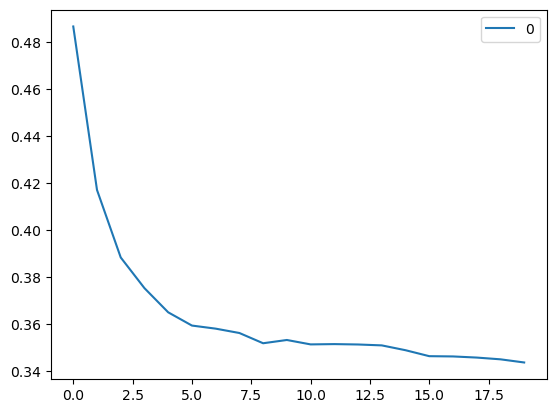

In [64]:
curve = pd.DataFrame(rmse_val) #belbow curve 
curve.plot()

In [73]:
rfc = RandomForestClassifier(n_estimators=100)
clf=MultinomialNB()
knn = KNeighborsClassifier(n_neighbors = 8)
dsc = tree.DecisionTreeClassifier()

rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
accuracy=accuracy_score(y_test,rfc_pred)
print("accuracy of random forest classifier is ",accuracy)
print(classification_report(y_test,rfc_pred))
print(round(r2_score(y_test,rfc_pred),2))

clf.fit(x_train,y_train)
clf_pred = clf.predict(x_test)
accuracy=accuracy_score(y_test,clf_pred)
print("accuracy of MultinomialNB is ",accuracy)
print(confusion_matrix(y_test,clf_pred))
print(round(r2_score(y_test,clf_pred),2))

knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy=accuracy_score(y_test,knn_pred)
print("accuracy of KNeighborsClassifier is ",accuracy)
print(confusion_matrix(y_test,knn_pred))
print(round(r2_score(y_test,knn_pred),2))

dsc.fit(x_train,y_train)
dsc_pred = dsc.predict(x_test)
accuracy=accuracy_score(y_test,dsc_pred)
print("accuracy of decision tree classifier is ",accuracy)
print(confusion_matrix(y_test,dsc_pred))
print(round(r2_score(y_test,dsc_pred),2))





[[ 115   94]
 [  12 1148]]
accuracy of random forest classifier is  0.9225712198685172
              precision    recall  f1-score   support

           0       0.91      0.55      0.68       209
           1       0.92      0.99      0.96      1160

    accuracy                           0.92      1369
   macro avg       0.91      0.77      0.82      1369
weighted avg       0.92      0.92      0.91      1369

0.4
accuracy of MultinomialNB is  0.870708546384222
[[  42  167]
 [  10 1150]]
0.0
accuracy of KNeighborsClassifier is  0.7779401022644266
[[146  63]
 [241 919]]
-0.72
accuracy of decision tree classifier is  0.9379108838568299
[[ 161   48]
 [  37 1123]]
0.52


In [72]:
dsc.tree_.max_depth

65

good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered